### HARMONIC ANALYSIS
___

In [1]:
import os
import spectrai as spa
from scipy import signal
import pywt
import scaleogram as scg 
import numpy as np
import matplotlib.pyplot as plt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

#import torch
#from kymatio import Scattering1D
#from kymatio.numpy import Scattering1D

%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
DATA_PATH = os.path.join('..', 'data')
VIETNAM_PATH =  os.path.join('vnm-petra', 'mir-models')
DATA_URL = os.path.join(DATA_PATH, VIETNAM_PATH, '*.*')
VIETNAM_MEAS_URL = os.path.join(DATA_PATH, 'vnm-petra', 'mir-models', '20090215-soil-database-mirs.xls')

X, X_names, y, y_names, instances_id, _ = spa.load_data_petra(DATA_URL, VIETNAM_MEAS_URL)
print('X shape: ', X.shape)
print(y_names)
print(instances_id)

X shape:  (130, 1763)
['TC' 'TOC' 'TIC' 'TN' 'CEC' 'K' 'FCAVER' 'FCIAVER' 'FSAAVER']
['Av001' 'Av003' 'Av005' 'Av008' 'Av013' 'Av014' 'Av018' 'Av020' 'Av023'
 'Av026' 'Av027' 'Av032' 'Av036' 'Av038' 'Av040' 'Av041' 'Av042' 'Av043'
 'Av045' 'Av048' 'Av051' 'Av057' 'Av061' 'Av062' 'Av063' 'Av064' 'Av065'
 'Av067' 'Av069' 'Av072' 'Av077' 'Av080' 'Av083' 'Av086' 'Av092' 'Av098'
 'Av100' 'Av102' 'Av105' 'Av106' 'Av108' 'Av110' 'Av113' 'Av121' 'Av127'
 'Av133' 'Av139' 'Av141' 'Av143' 'Av146' 'Av147' 'Av149' 'Av152' 'Av155'
 'Av161' 'Av165' 'Av169' 'Av171' 'Av174' 'Av175' 'Av177' 'Av180' 'Av183'
 'Av189' 'Av195' 'Av203' 'Av205' 'Av208' 'Av209' 'Av211' 'Av214' 'Av217'
 'Av225' 'Av226' 'Av235' 'Av239' 'Av242' 'Av244' 'Av246' 'Av247' 'Av249'
 'Av252' 'Av255' 'Av261' 'Av265' 'Av267' 'Av268' 'Av272' 'Av365' 'Av366'
 'Av367' 'Av368' 'Av369' 'Av370' 'Av371' 'Av372' 'Av373' 'Av374' 'Av375'
 'Av376' 'Av377' 'Av378' 'Av379' 'Av380' 'F1 1.1A' 'F1 1.1B' 'F1 1.3A'
 'F1 1.3B' 'F1 1.6A' 'F1 1.6B' 'F1 2.3' '

In [3]:
X.shape

(130, 1763)

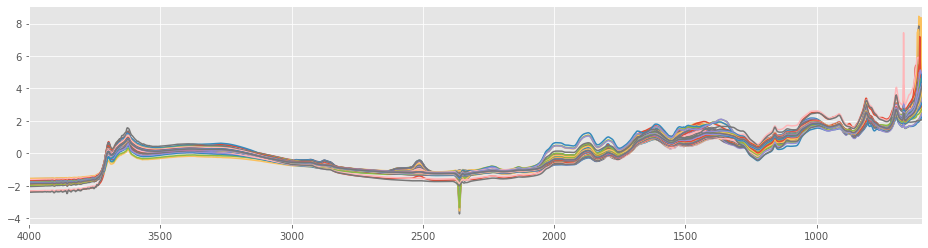

In [4]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_xlim(4000, 600)
    _ = ax.plot(X_names, X.T)

### Discrete Fourier Transform
*Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft*

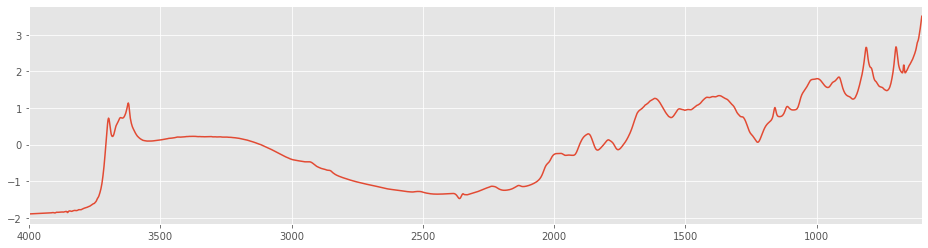

In [5]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_xlim(4000, 600)
    _ = ax.plot(X_names, X[0])

In [6]:
dft = np.fft.fft(X[0])

In [7]:
type(dft[0])

numpy.complex128

In [8]:
dft_abs = np.abs(dft) 

In [9]:
N = X.shape[1]//2 + 1

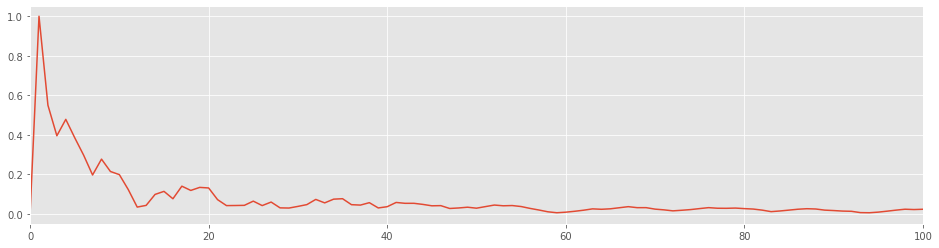

In [10]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_xlim(0, 100)
    _ = ax.plot(dft_abs/np.max(dft_abs))

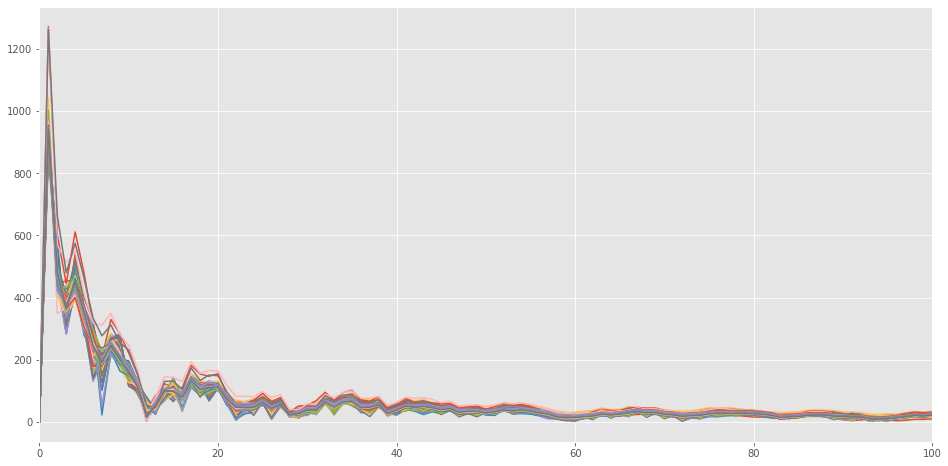

In [11]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.set_xlim(0, 100)
    #ax.set_ylim(0, 60)
    _ = ax.plot(np.abs(np.fft.fft(X)).T)

In [12]:
X.shape

(130, 1763)

### Filtering and iFFT

#### Low-pass filter

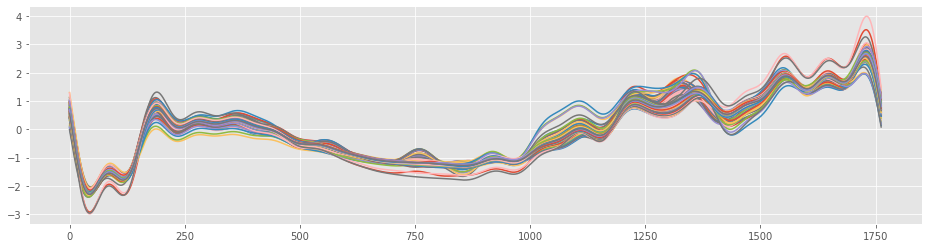

In [57]:
k = 20
mask_from = k
mask_to = X.shape[1]-k

dft_filtered = np.fft.fft(X)
dft_filtered[:,mask_from:mask_to] = 0

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,4))
    #ax.set_xlim(4000, 600)
    _ = ax.plot(np.fft.ifft(dft_filtered).real.T)

#### High-pass filter

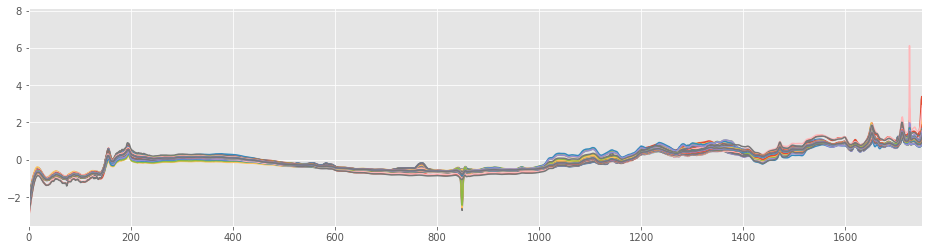

In [40]:
mask_from = 0
mask_to = 50

dft_filtered = np.fft.fft(X)
dft_filtered[:,mask_from:mask_to] = 0

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_xlim(0, 1750)
    _ = ax.plot(np.fft.ifft(dft_filtered).real.T)

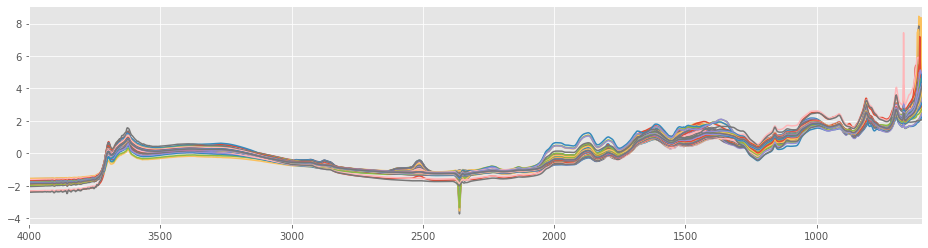

In [23]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_xlim(4000, 600)
    _ = ax.plot(X_names, X.T)

### Short Time Fourier Transform and spectrogram

In [15]:
X[0].shape

(1763,)

In [16]:
def get_amp(x):
    return np.abs(x.max() - x.min())

In [17]:
get_amp(X[0])

5.3965845

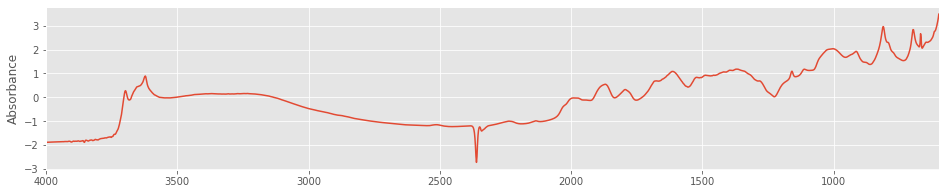

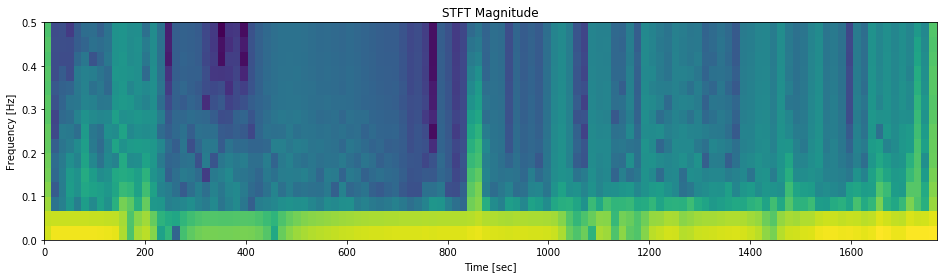

In [18]:
SAMPLE_IDX = 91
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,3))
    ax.set_xlim(4000, 600)
    _ = ax.plot(X_names, X[SAMPLE_IDX])
    plt.ylabel('Absorbance')

amp = get_amp(X[0])
f, t, Zxx = signal.stft(X[SAMPLE_IDX], fs=1, window='hamming', nperseg=30)

fig, ax = plt.subplots(figsize=(16,4))
_ = ax.pcolormesh(t, f, np.log10(np.abs(Zxx)))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

In [23]:
len(X[SAMPLE_IDX])

1763

Text(0.5, 1.0, 'Time-Frequency spectrogram of signal')

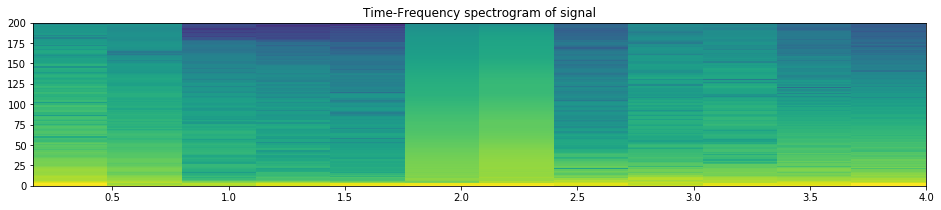

In [27]:
plt.figure(figsize=(16, 3))
plt.specgram(X[SAMPLE_IDX], Fs=400)
plt.title("Time-Frequency spectrogram of signal")


In [390]:
np.abs(Zxx).min()

2.3580276e-06

### Wavelets
References:
* http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
* https://www.kaggle.com/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

In [25]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


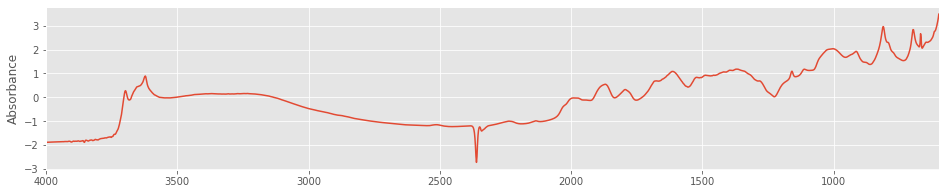

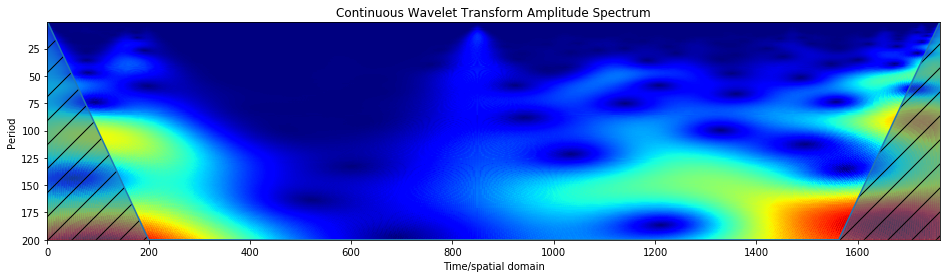

In [74]:
SAMPLE_IDX = 91
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16,3))
    ax.set_xlim(4000, 600)
    _ = ax.plot(X_names, X[SAMPLE_IDX])
    plt.ylabel('Absorbance')

scales = scg.periods2scales(np.arange(1, 200))
scg.cws(X[SAMPLE_IDX], scales=scales, cbar=None, coi=True, figsize=(16,4)); 

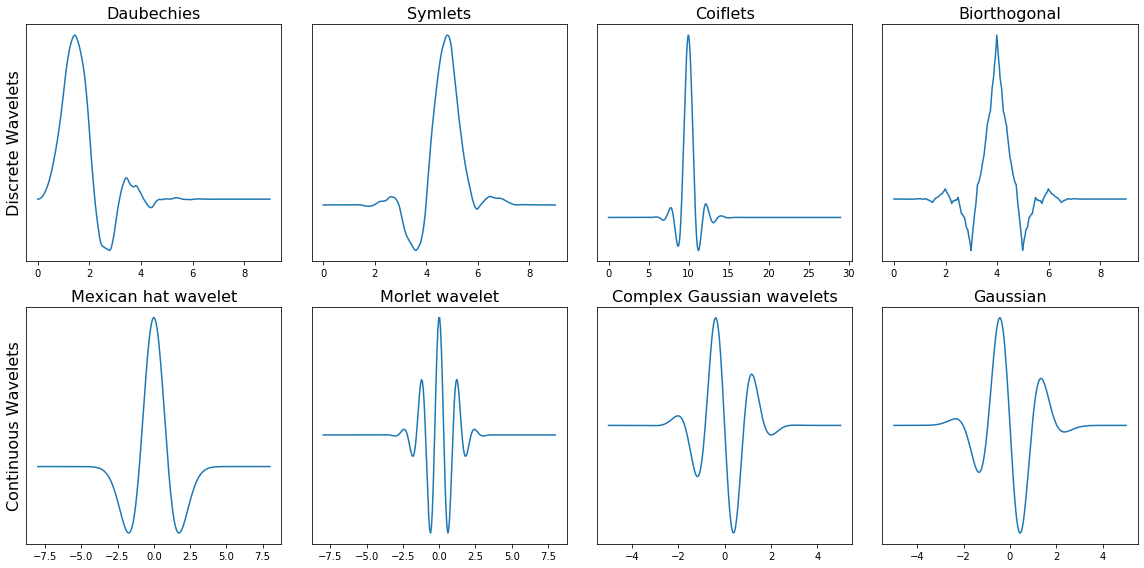

In [60]:
# Plotting available wavelets
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

In [67]:
X[0].shape

(1763,)

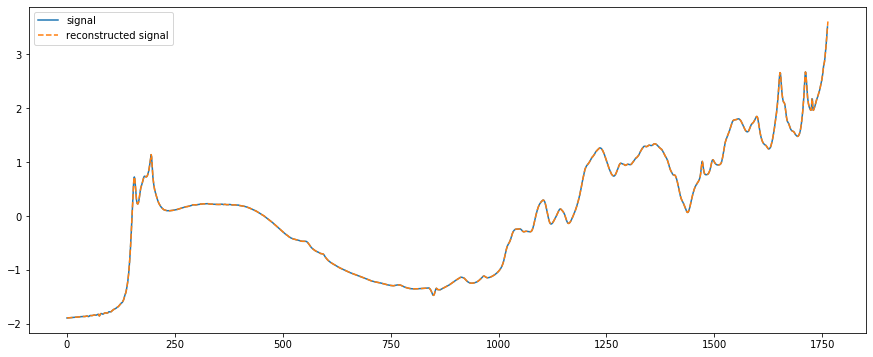

In [74]:
signal = X[0]
(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()

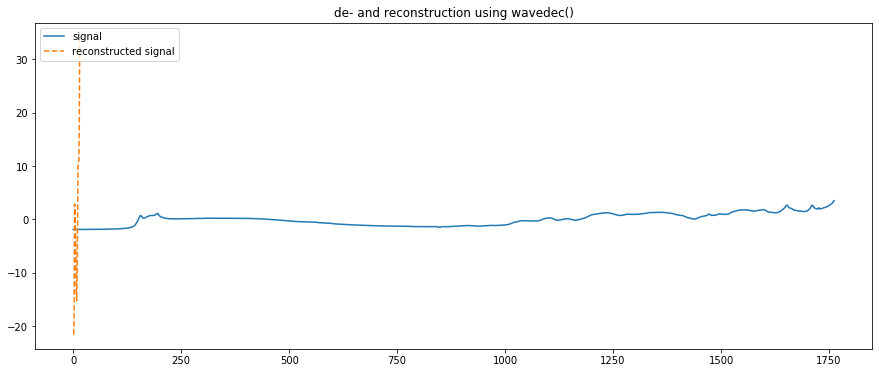

In [91]:
coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs[0:2], 'db2')

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

In [82]:
coeffs[0:2]

[array([-30.28202   , -32.81259   ,  -5.86535   ,   0.34385687,
        -17.92136   , -17.739666  ,   8.986561  ,  13.999563  ,
         42.483307  ], dtype=float32),
 array([ 0.03215504, -9.337803  ,  4.561599  , -0.62029433, -3.3495781 ,
        -1.0276123 ,  1.3047657 , -5.3218927 ,  9.893143  ], dtype=float32)]

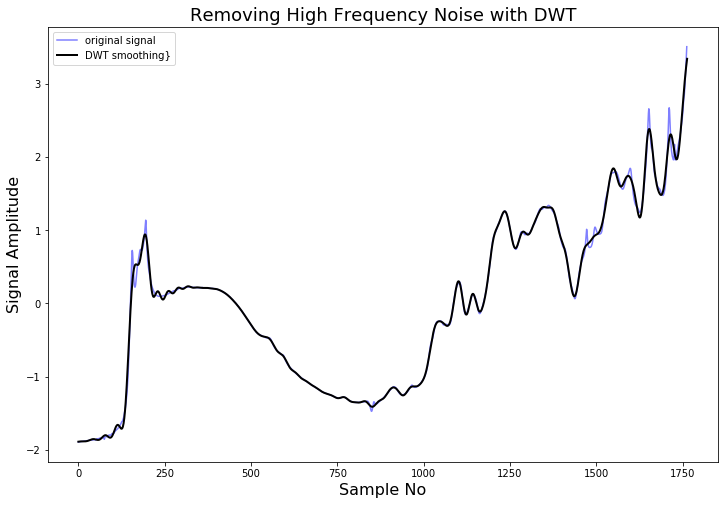

In [120]:
def lowpassfilter(signal, thresh = 0.63, wavelet="db38"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="constant" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="constant" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.99)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

In [128]:
signal.shape

(1763,)

In [153]:
coeffs = pywt.wavedec(signal, 'sym8', level=4)
len(coeffs)

5

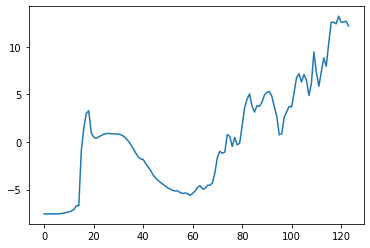

In [161]:
plt.plot(coeffs[0])